In [2]:
#Importacion de librerias  pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datasets (reemplaza 'ruta_del_archivo' con la ubicación correcta)
df_venecia = pd.read_csv("VENECIA_BUENO_SIN_NULOS2.csv")
df_venecia.head(5)

,id,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_total_listings_count.1,price
0,2.246641e+07,previous scrape,Biennale house in Corte Celsi,Carefully furnished apartment near the Arsenal...,"The neighborhood of Cannaregio is very quiet, ...",164674166,Maurizio,28/12/2017,"London, United Kingdom",sono appassionato di arte e calligrafia.,...,4.56,IT027042B4ZE3VF2NF,f,1,1,0,0,0.43,3,$290.00
1,7.060000e+17,previous scrape,San Marco appartamento centrale,First floor flat just 100 metres from San Marc...,"The neighborhood of Cannaregio is very quiet, ...",48092742,Ciars,03/11/2015,"London, United Kingdom",sono appassionato di arte e calligrafia.,...,4.79,IT027042B4ZE3VF2NF,f,46,24,22,0,0.43,77,$390.00
2,7.360000e+17,previous scrape,Camera veneziana centrale Rialto,"This special place is close to everything, mak...","The neighborhood of Cannaregio is very quiet, ...",48092742,Ciars,03/11/2015,"London, United Kingdom",sono appassionato di arte e calligrafia.,...,4.79,IT027042B4ZE3VF2NF,f,46,24,22,0,0.43,77,$420.00
3,1.210000e+18,previous scrape,Single room (shared wc),we are in the historic center of the heart of ...,"The neighborhood of Cannaregio is very quiet, ...",12355491,Ali,18/02/2014,"Venice, Italy",sono appassionato di arte e calligrafia.,...,4.79,IT027042B4ZE3VF2NF,t,6,0,4,0,3.31,6,$167.00
4,1.210000e+18,city scrape,Paruta Corte Nascosta Apartment,Relax in this peaceful and centrally-located p...,"The neighborhood of Cannaregio is very quiet, ...",311957953,Hotel Palazzo Paruta E Apartments,25/11/2019,"Venice, Italy",My name is Faruk Ahammed . I live in venice.,...,5.00,IT027042B4ZE3VF2NF,t,12,12,0,0,1.05,18,$289.00


In [3]:
df_venecia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8163 entries, 0 to 8162
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8163 non-null   float64
 1   source                                        8163 non-null   object 
 2   name                                          8163 non-null   object 
 3   description                                   8163 non-null   object 
 4   neighborhood_overview                         8163 non-null   object 
 5   host_id                                       8163 non-null   int64  
 6   host_name                                     8163 non-null   object 
 7   host_since                                    8163 non-null   object 
 8   host_location                                 8163 non-null   object 
 9   host_about                                    8163 non-null   o

In [4]:
df_venecia["price"] =df_venecia["price"].fillna(method="bfill")

C:\Users\HP\AppData\Local\Temp\ipykernel_19536\2973364586.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_venecia["price"] =df_venecia["price"].fillna(method="bfill")


In [5]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
   "name", "description", "neighborhood_overview", "host_name", "host_since",
  "host_location", "host_response_rate", "neighbourhood",
   "bathrooms_text", "amenities", "host_neighbourhood",
   "neighbourhood_cleansed", "source", "host_response_time","license",
    "host_verifications", "host_has_profile_pic","host_about", "neighbourhood_group_cleansed", "has_availability","first_review","last_review"
]

# Eliminar columnas del DataFrame
df_venecia = df_venecia.drop(columns=columnas_a_eliminar)

In [6]:
df_venecia.isnull().sum()

id                                              0
host_id                                         0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_identity_verified                          0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0


In [7]:
#Cambia el true=1 y false=0
df_venecia['host_identity_verified'] = df_venecia['host_identity_verified'].map({'t': 1, 'f': 0})
df_venecia['instant_bookable'] = df_venecia['instant_bookable'].map({'t': 1, 'f': 0})
df_venecia['host_is_superhost'] = df_venecia['host_is_superhost'].map({'t': 1, 'f': 0})

In [8]:
df_venecia[['host_identity_verified', 'instant_bookable', 'host_is_superhost']].head()

,host_identity_verified,instant_bookable,host_is_superhost
0,0,0,0
1,0,0,0
2,0,0,0
3,1,1,1
4,1,1,1


In [9]:
df_venecia['host_acceptance_rate'] = df_venecia['host_acceptance_rate'].astype(str).str.replace('%', '').astype(float)

In [11]:
df_venecia.to_csv("venecia_bueno_sin_nulos22.csv")

In [12]:
# Eliminar el símbolo de dólar y la coma, y convertir a tipo float
#mexico_entire_home['price'] = mexico_entire_home['price'].replace(r'[\$,]', '', regex=True).astype(float)
df_venecia['price'] = df_venecia['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_19536\2914146207.py:3: SyntaxWarning: invalid escape sequence '\$'
  df_venecia['price'] = df_venecia['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

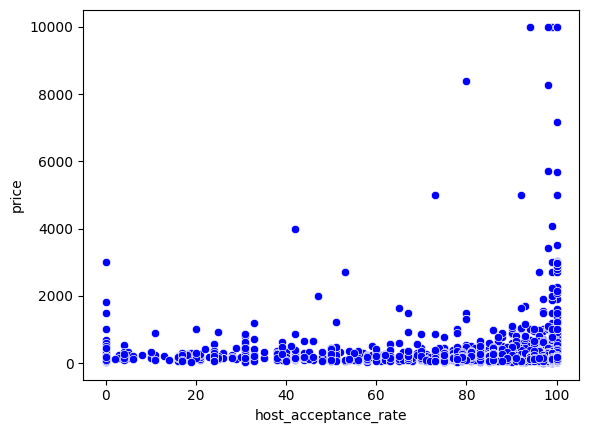

In [13]:
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df_venecia)

In [14]:
df_venecia['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [15]:
#Filtrar los datos por cada tipo de habitación
venecia_entire_home = df_venecia[df_venecia['room_type'] == 'Entire home/apt']
venecia_private_room = df_venecia[df_venecia['room_type'] == 'Private room']
venecia_shared_room = df_venecia[df_venecia['room_type'] == 'Shared room']
venecia_hotel_room = df_venecia[df_venecia['room_type'] == 'Hotel room']

In [16]:
# Verificamos el tamaño de cada DataFrame
len(venecia_entire_home), len(venecia_private_room), len(venecia_shared_room), len(venecia_hotel_room)

(6335, 1701, 28, 99)

In [17]:
# Guardar los DataFrames en archivos CSV
venecia_entire_home.to_csv("venecia_entire_home.csv", index=False)
venecia_private_room.to_csv("venecia_private_room.csv", index=False)
venecia_shared_room.to_csv("venecia_shared_room.csv", index=False)
venecia_hotel_room.to_csv("venecia_hotel_room.csv", index=False)


venecia_entire_home     
PRICE Vs host_acceptance_rate

In [18]:
# Cargar archivos CSV de México
venecia_entire_home = pd.read_csv("venecia_entire_home.csv")

In [19]:
venecia_entire_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6335 non-null   float64
 1   host_id                                       6335 non-null   int64  
 2   host_acceptance_rate                          6335 non-null   float64
 3   host_is_superhost                             6335 non-null   int64  
 4   host_listings_count                           6335 non-null   int64  
 5   host_total_listings_count                     6335 non-null   int64  
 6   host_identity_verified                        6335 non-null   int64  
 7   property_type                                 6335 non-null   object 
 8   room_type                                     6335 non-null   object 
 9   accommodates                                  6335 non-null   i

In [20]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
   "calendar_last_scraped"
]

# Eliminar columnas del DataFrame
df_venecia = df_venecia.drop(columns=columnas_a_eliminar)

In [21]:
venecia_entire_home['host_acceptance_rate'] = venecia_entire_home['host_acceptance_rate'].astype(str).str.replace('%', '').astype(float)

In [22]:
# Eliminar el símbolo de dólar y la coma, y convertir a tipo float
#mexico_entire_home['price'] = mexico_entire_home['price'].replace(r'[\$,]', '', regex=True).astype(float)
venecia_entire_home['price'] = venecia_entire_home['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_19536\543413500.py:3: SyntaxWarning: invalid escape sequence '\$'
  venecia_entire_home['price'] = venecia_entire_home['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [23]:
#Verifica si la columna ahora es numérica
venecia_entire_home['price'].dtype

dtype('float64')

In [24]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_entire_home[['host_acceptance_rate']]
Vars_Dep=venecia_entire_home['price']

In [7]:
#Se define model como funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [26]:
#verificamos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [27]:
#Ajustamos

#matrices=letra mayuscula
#vector=letra minusculka
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [28]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.35107584]),
 'rank_': 1,
 'singular_': array([1303.63676213]),
 'intercept_': 277.67104893982764}

Modelo matemático:y=-0.35107584 * 277.67104893982764

In [29]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.00022159435531887706

In [30]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_entire_home[['host_acceptance_rate']])
y_pred

array([242.56346534, 242.56346534, 242.56346534, ..., 242.56346534,
       252.04251291, 252.04251291])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_entire_home.insert(0, 'Predicciones', y_pred)
venecia_entire_home

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

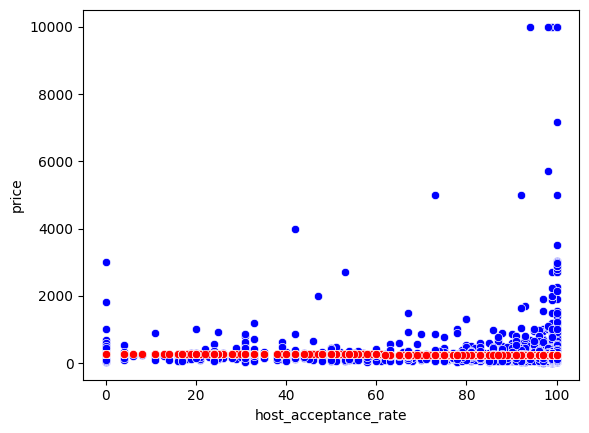

In [32]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=venecia_entire_home)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=venecia_entire_home)

In [33]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.00022159435531887706

In [34]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.014886045657557183

In [43]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    #"room_type","property_type",
    "calendar_last_scraped"
]

# Eliminar columnas del DataFrame
venecia_entire_home = venecia_entire_home.drop(columns=columnas_a_eliminar)

In [81]:
#sns.pairplot(mexico_entire_home)

In [44]:
venecia_entire_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Predicciones                                  6335 non-null   float64
 1   id                                            6335 non-null   float64
 2   host_id                                       6335 non-null   int64  
 3   host_acceptance_rate                          6335 non-null   float64
 4   host_is_superhost                             6335 non-null   int64  
 5   host_listings_count                           6335 non-null   int64  
 6   host_total_listings_count                     6335 non-null   int64  
 7   host_identity_verified                        6335 non-null   int64  
 8   accommodates                                  6335 non-null   int64  
 9   bathrooms                                     6335 non-null   f

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_entire_home.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

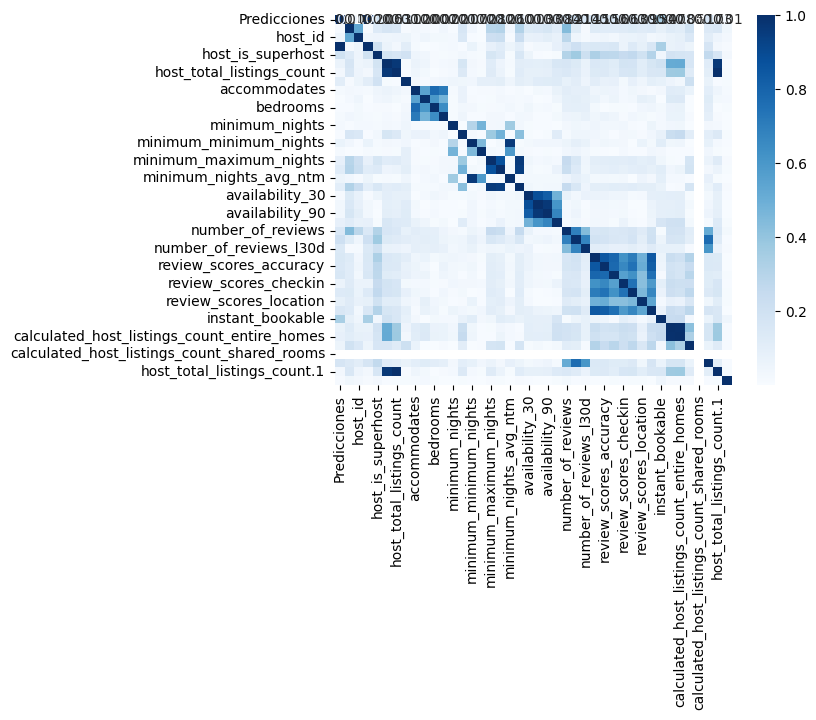

In [47]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs host_is_superhost”

In [3]:
venecia_entire_home1 = pd.read_csv("venecia_entire_home.csv")

In [4]:
venecia_entire_home1['price'] = venecia_entire_home1['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_18632\3488257121.py:1: SyntaxWarning: invalid escape sequence '\$'
  venecia_entire_home1['price'] = venecia_entire_home1['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [5]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]

Vars_Indep=venecia_entire_home1[['host_is_superhost']]
Vars_Dep=venecia_entire_home1['price']

In [8]:
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([22.67153935]),
 'rank_': 1,
 'singular_': array([39.67859031]),
 'intercept_': 233.9662855467608}

Modelo matemático:y=22.67153935 * 233.9662855467608

In [9]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.0008560873984649886

In [10]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_entire_home1[['host_is_superhost']])
y_pred

array([233.96628555, 233.96628555, 256.6378249 , ..., 256.6378249 ,
       233.96628555, 233.96628555])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_entire_home1.insert(0, 'Predicciones', y_pred)
venecia_entire_home1

<Axes: xlabel='host_is_superhost', ylabel='price'>

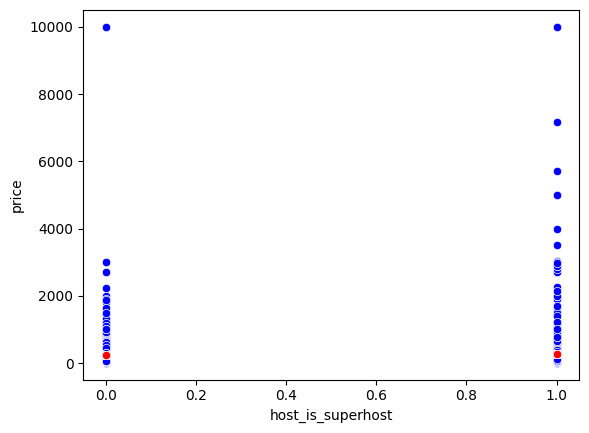

In [12]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=venecia_entire_home1)
sns.scatterplot(x='host_is_superhost', y='Predicciones', color="red", data=venecia_entire_home1)

In [13]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0008560873984649886

In [14]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.02925897124755053

In [15]:
venecia_entire_home1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Predicciones                                  6335 non-null   float64
 1   id                                            6335 non-null   float64
 2   host_id                                       6335 non-null   int64  
 3   host_acceptance_rate                          6335 non-null   float64
 4   host_is_superhost                             6335 non-null   int64  
 5   host_listings_count                           6335 non-null   int64  
 6   host_total_listings_count                     6335 non-null   int64  
 7   host_identity_verified                        6335 non-null   int64  
 8   property_type                                 6335 non-null   object 
 9   room_type                                     6335 non-null   o

In [17]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    "calendar_last_scraped",
    "property_type",
    "room_type"
]
# Eliminar columnas del DataFrame
venecia_entire_home1 = venecia_entire_home1.drop(columns=columnas_a_eliminar)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_entire_home1.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

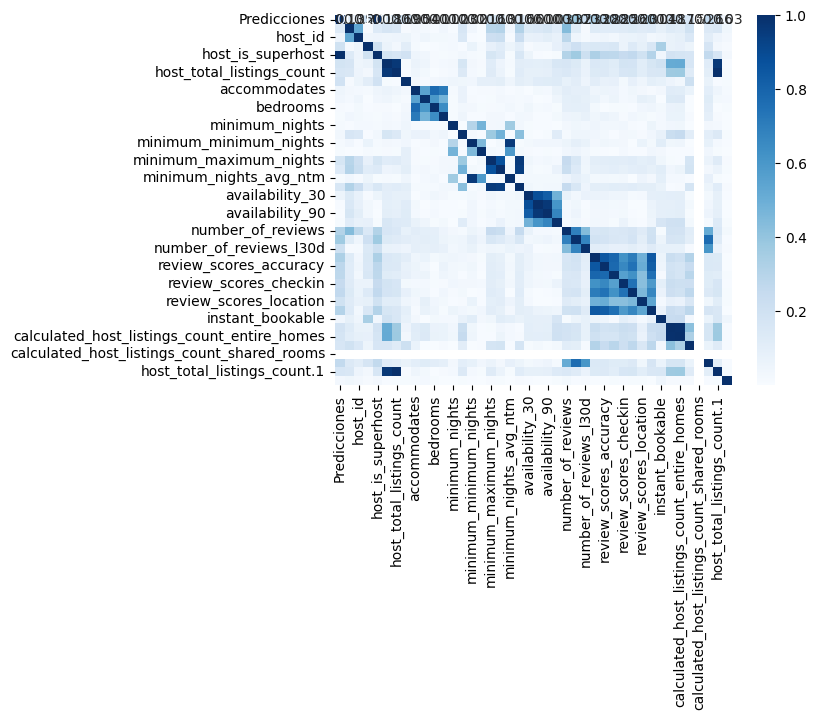

In [20]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“accommodates vs bathrooms” 


In [24]:
venecia_entire_home2 = pd.read_csv("venecia_entire_home.csv")

In [25]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_entire_home2[['bathrooms']]
Vars_Dep=venecia_entire_home2['accommodates']

In [26]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.51976992]),
 'rank_': 1,
 'singular_': array([53.5915941]),
 'intercept_': 2.0696375801831914}

Modelo matemático:y=1.51976992 * 2.0696375801831914

In [27]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.3065910266257579

In [28]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_entire_home2[['bathrooms']])
y_pred

array([3.5894075 , 3.5894075 , 3.5894075 , ..., 5.10917743, 6.62894735,
       4.34929247])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_entire_home2.insert(0, 'Predicciones', y_pred)
venecia_entire_home2


<Axes: xlabel='bathrooms', ylabel='accommodates'>

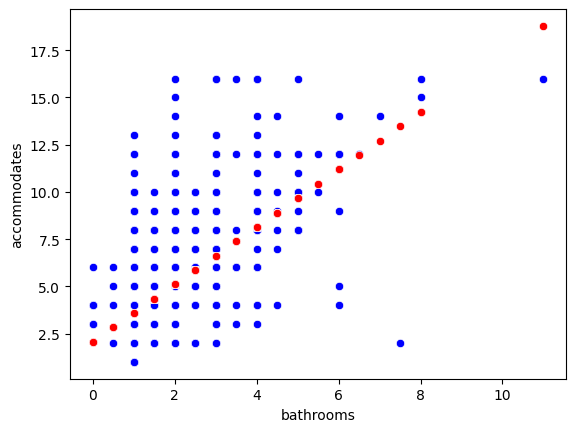

In [30]:

sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=venecia_entire_home2)
sns.scatterplot(x='bathrooms', y='Predicciones', color="red", data=venecia_entire_home2)


In [31]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.3065910266257579

In [32]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.5537066250513514

In [34]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    "calendar_last_scraped",
    "property_type",
    "room_type"
]
# Eliminar columnas del DataFrame
venecia_entire_home2 = venecia_entire_home2.drop(columns=columnas_a_eliminar)

In [35]:
venecia_entire_home2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Predicciones                                  6335 non-null   float64
 1   id                                            6335 non-null   float64
 2   host_id                                       6335 non-null   int64  
 3   host_acceptance_rate                          6335 non-null   float64
 4   host_is_superhost                             6335 non-null   int64  
 5   host_listings_count                           6335 non-null   int64  
 6   host_total_listings_count                     6335 non-null   int64  
 7   host_identity_verified                        6335 non-null   int64  
 8   accommodates                                  6335 non-null   int64  
 9   bathrooms                                     6335 non-null   f

In [36]:
#mexico_entire_home['price'] = mexico_entire_home['price'].replace(r'[\$,]', '', regex=True).astype(float)
venecia_entire_home2['price'] = venecia_entire_home2['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_18632\218342975.py:2: SyntaxWarning: invalid escape sequence '\$'
  venecia_entire_home2['price'] = venecia_entire_home2['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [ ]:

#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_entire_home2.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

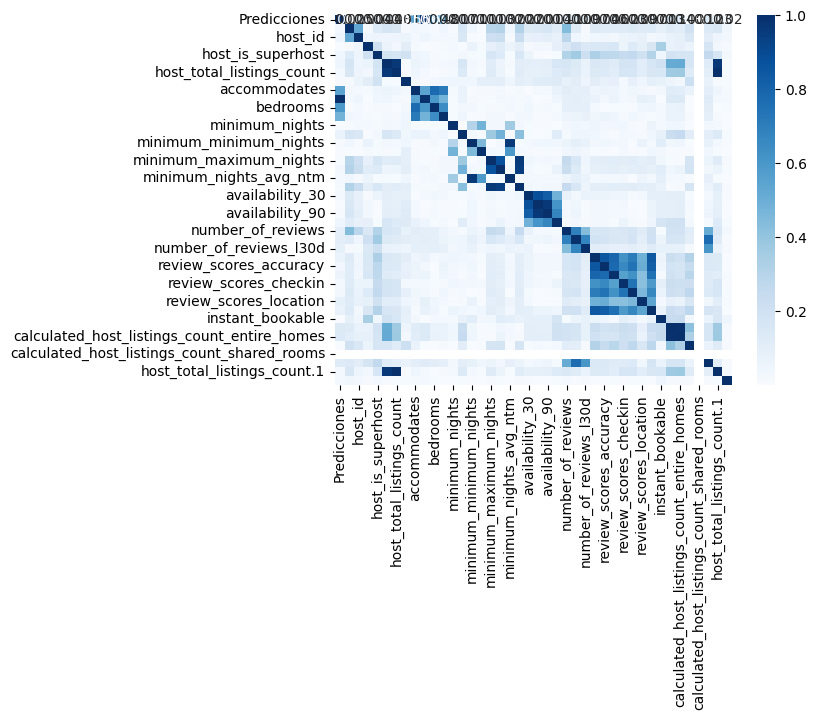

In [39]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

price vs review_scores_cleanliness

In [40]:
venecia_entire_home3 = pd.read_csv("venecia_entire_home.csv")

In [52]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    "name", "description", "neighborhood_overview", "host_name", "host_since",
    "host_location", "host_response_rate", "neighbourhood", "property_type",
    "room_type", "bathrooms_text", "amenities", "host_neighbourhood",
    "neighbourhood_cleansed", "source", "host_response_time",
    "host_verifications", "host_has_profile_pic"
]

In [41]:
# Eliminar el símbolo de dólar y la coma, y convertir a tipo float
#mexico_entire_home['price'] = mexico_entire_home['price'].replace(r'[\$,]', '', regex=True).astype(float)
venecia_entire_home3['price'] = venecia_entire_home3['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_18632\213788705.py:3: SyntaxWarning: invalid escape sequence '\$'
  venecia_entire_home3['price'] = venecia_entire_home3['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [42]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_entire_home3[['review_scores_cleanliness']]
Vars_Dep=venecia_entire_home3['price']


In [43]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([10.92384735]),
 'rank_': 1,
 'singular_': array([27.97614549]),
 'intercept_': 192.3105767957641}

Modelo matemático:y=10.92384735 * 192.3105767957641

In [44]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

9.880311104648598e-05

In [45]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_entire_home3[['review_scores_cleanliness']])
y_pred

array([240.81245905, 245.40047493, 246.92981356, ..., 246.92981356,
       246.92981356, 246.92981356])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_entire_home3.insert(0, 'Predicciones', y_pred)
venecia_entire_home3

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

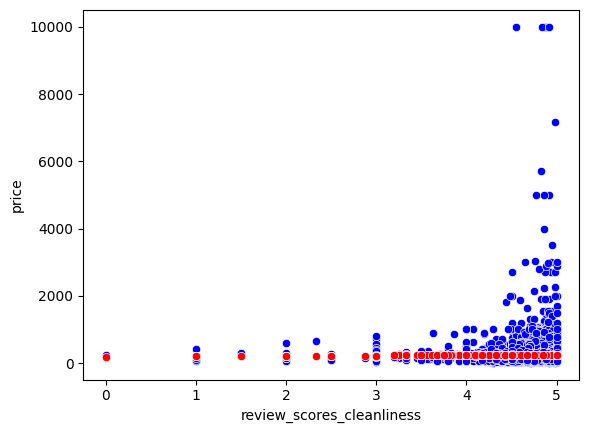

In [47]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=venecia_entire_home3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="red", data=venecia_entire_home3)

In [48]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

9.880311104648598e-05

In [49]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.009939975404722388

In [54]:
venecia_entire_home3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Predicciones                                  6335 non-null   float64
 1   id                                            6335 non-null   float64
 2   host_id                                       6335 non-null   int64  
 3   host_acceptance_rate                          6335 non-null   float64
 4   host_is_superhost                             6335 non-null   int64  
 5   host_listings_count                           6335 non-null   int64  
 6   host_total_listings_count                     6335 non-null   int64  
 7   host_identity_verified                        6335 non-null   int64  
 8   property_type                                 6335 non-null   object 
 9   room_type                                     6335 non-null   o

In [55]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    "calendar_last_scraped",
    "property_type",
    "room_type"
]
# Eliminar columnas del DataFrame
venecia_entire_home3 = venecia_entire_home3.drop(columns=columnas_a_eliminar)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_entire_home3.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

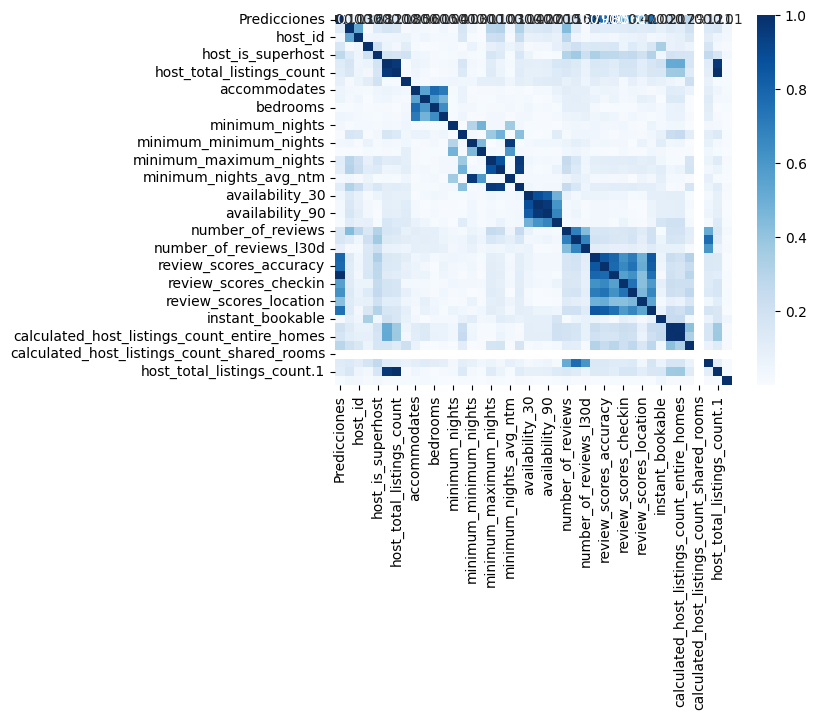

In [58]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs host_identity_verified”


In [59]:
venecia_entire_home4 = pd.read_csv("venecia_entire_home.csv")


In [60]:
# Eliminar el símbolo de dólar y la coma, y convertir a tipo float
#mexico_entire_home['price'] = mexico_entire_home['price'].replace(r'[\$,]', '', regex=True).astype(float)
venecia_entire_home4['price'] = venecia_entire_home4['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_18632\513204500.py:3: SyntaxWarning: invalid escape sequence '\$'
  venecia_entire_home4['price'] = venecia_entire_home4['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [61]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_entire_home4[['host_identity_verified']]
Vars_Dep=venecia_entire_home4['price']


In [62]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([18.2057091]),
 'rank_': 1,
 'singular_': array([18.68884502]),
 'intercept_': 227.29110512129418}

Modelo matemático:y=18.2057091 * 227.29110512129418


In [63]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)


0.00012246831466755648

In [64]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_entire_home4[['host_identity_verified']])
y_pred


array([227.29110512, 227.29110512, 245.49681422, ..., 245.49681422,
       245.49681422, 245.49681422])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_entire_home4.insert(0, 'Predicciones', y_pred)
venecia_entire_home4


<Axes: xlabel='host_identity_verified', ylabel='price'>

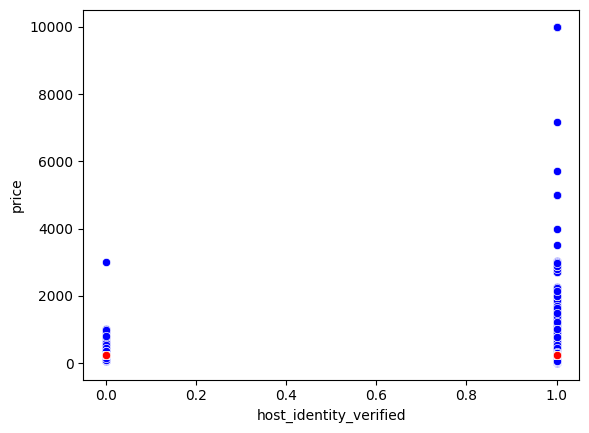

In [66]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=venecia_entire_home4)
sns.scatterplot(x='host_identity_verified', y='Predicciones', color="red", data=venecia_entire_home4)


In [67]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.00012246831466755648

In [68]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.011066540320604109

In [70]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    "calendar_last_scraped",
    "property_type",
    "room_type"
]
# Eliminar columnas del DataFrame
mexico_entire_home4 = venecia_entire_home4.drop(columns=columnas_a_eliminar)


In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_entire_home4.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

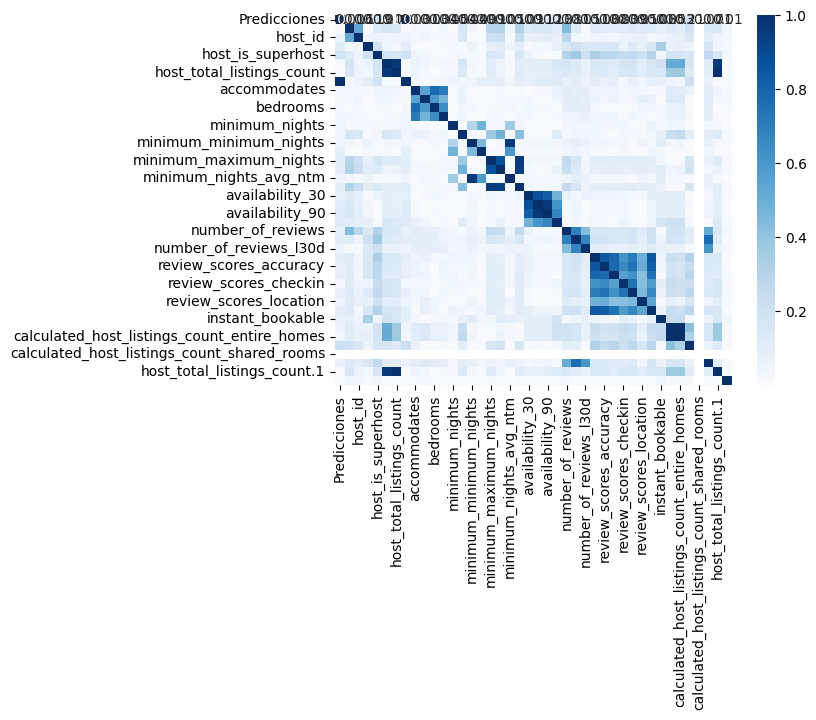

In [73]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs instant_bookable”


In [ ]:
venecia_entire_home5 = pd.read_csv("venecia_entire_home.csv")

In [ ]:
# Eliminar el símbolo de dólar y la coma, y convertir a tipo float
#mexico_entire_home['price'] = mexico_entire_home['price'].replace(r'[\$,]', '', regex=True).astype(float)
venecia_entire_home5['price'] = venecia_entire_home5['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_15612\3853238674.py:3: SyntaxWarning: invalid escape sequence '\$'
  mexico_entire_home5['price'] = mexico_entire_home5['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [ ]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_entire_home5[['instant_bookable']]
Vars_Dep=venecia_entire_home5['price']


In [154]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-31.91388083]),
 'rank_': 1,
 'singular_': array([64.74364317]),
 'intercept_': 1800.5424684159375}

Modelo matemático:y=-31.91388083*1800.5424684159375

In [155]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

1.0441464011634594e-05

In [ ]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_entire_home5[['instant_bookable']])
y_pred


array([1800.54246842, 1800.54246842, 1800.54246842, ..., 1768.62858759,
       1768.62858759, 1768.62858759])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_entire_home5.insert(0, 'Predicciones', y_pred)
venecia_entire_home5


<Axes: xlabel='instant_bookable', ylabel='price'>

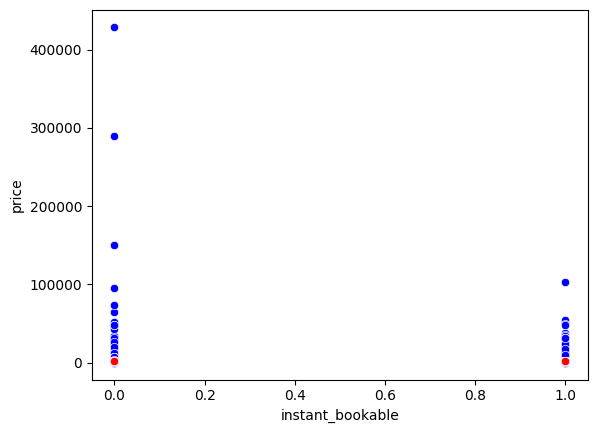

In [ ]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=venecia_entire_home5)
sns.scatterplot(x='instant_bookable', y='Predicciones', color="red", data=venecia_entire_home5)


In [159]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

1.0441464011634594e-05

In [160]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.003231325426451906

In [ ]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    "name", "description", "neighborhood_overview", "host_name", "host_since",
    "host_location", "host_response_rate", "neighbourhood", "property_type",
    "room_type", "bathrooms_text", "amenities", "host_neighbourhood",
    "neighbourhood_cleansed", "source", "host_response_time",
    "host_verifications", "host_has_profile_pic", "host_identity_verified"
]
# Eliminar columnas del DataFrame
mexico_entire_home5 = venecia_entire_home5.drop(columns=columnas_a_eliminar)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_entire_home5.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

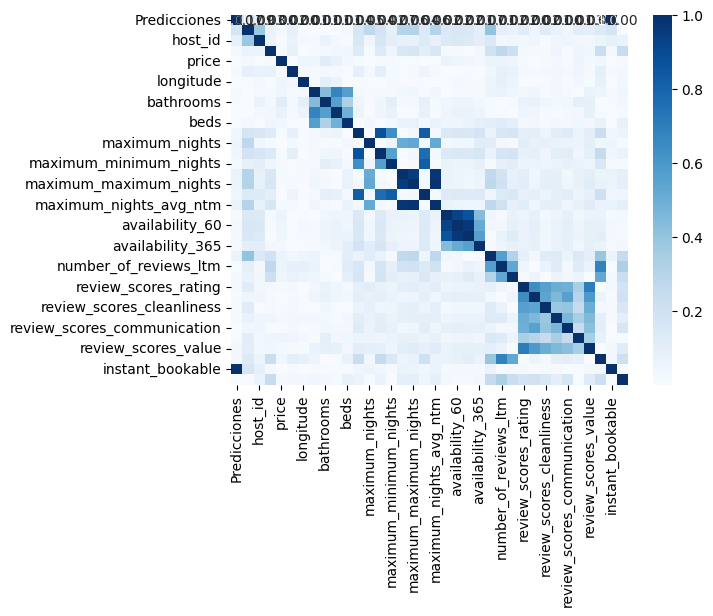

In [164]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“Price vs property_type”


In [74]:
venecia_entire_home6 = pd.read_csv("venecia_entire_home.csv")

In [75]:
# Eliminar el símbolo de dólar y la coma, y convertir a tipo float
#mexico_entire_home['price'] = mexico_entire_home['price'].replace(r'[\$,]', '', regex=True).astype(float)
venecia_entire_home6['price'] = venecia_entire_home6['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_18632\2731536717.py:3: SyntaxWarning: invalid escape sequence '\$'
  venecia_entire_home6['price'] = venecia_entire_home6['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [77]:
venecia_entire_home6['property_type'] = venecia_entire_home6['property_type'].astype('category').cat.codes

In [78]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    "calendar_last_scraped",
    "room_type"
]
# Eliminar columnas del DataFrame
venecia_entire_home6 = venecia_entire_home6.drop(columns=columnas_a_eliminar)

In [79]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_entire_home6[['property_type']]
Vars_Dep=venecia_entire_home6['price']


In [80]:
# Ver categorías únicas de room_type
venecia_entire_home6['property_type'].unique()

array([12,  4, 10,  8, 11, 13, 16, 17,  0,  6, 19, 15, 14,  7, 18,  9,  2,
        5,  3,  1], dtype=int8)

In [81]:
venecia_entire_home6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6335 non-null   float64
 1   host_id                                       6335 non-null   int64  
 2   host_acceptance_rate                          6335 non-null   float64
 3   host_is_superhost                             6335 non-null   int64  
 4   host_listings_count                           6335 non-null   int64  
 5   host_total_listings_count                     6335 non-null   int64  
 6   host_identity_verified                        6335 non-null   int64  
 7   property_type                                 6335 non-null   int8   
 8   accommodates                                  6335 non-null   int64  
 9   bathrooms                                     6335 non-null   f

In [82]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.1692848]),
 'rank_': 1,
 'singular_': array([258.37457009]),
 'intercept_': 242.68962218343694}

Modelo matemático:y=0.1692848 * 242.68962218343694

In [83]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

2.023853610255699e-06

In [84]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_entire_home6[['property_type']])
y_pred

array([244.72103982, 243.36676139, 244.72103982, ..., 244.72103982,
       244.72103982, 244.72103982])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_entire_home6.insert(0, 'Predicciones', y_pred)
venecia_entire_home6


<Axes: xlabel='property_type', ylabel='price'>

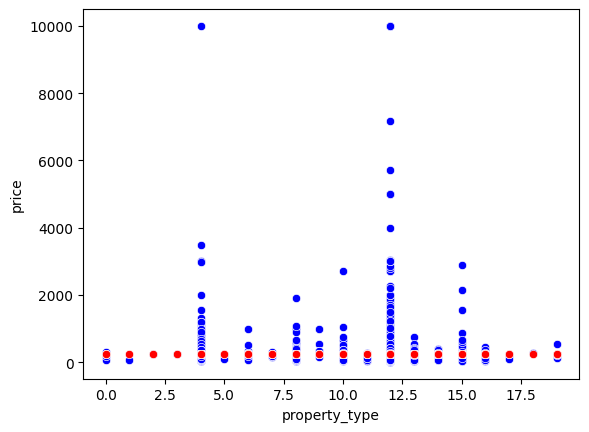

In [86]:
sns.scatterplot(x='property_type', y='price', color="blue", data=venecia_entire_home6)
sns.scatterplot(x='property_type', y='Predicciones', color="red", data=venecia_entire_home6)

In [87]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

2.023853610255699e-06

In [88]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0014226220897538809

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_entire_home6.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

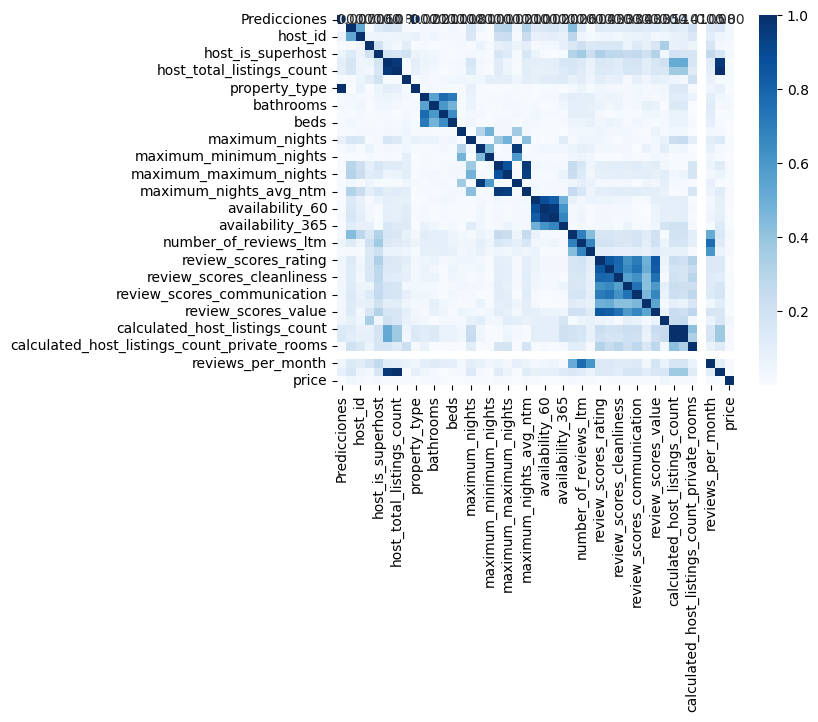

In [91]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map